# Tick 2

## Code

### Initialization

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
rng = np.random.default_rng(0)

In [3]:
import os.path
if os.path.exists('covid_global_20201213.csv'):
    print('file already downloaded!')
else:
    !wget "https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/covid_global_20201213.csv"

file already downloaded!


In [4]:
covdata = pandas.read_csv('covid_global_20201213.csv')

## Part a

### Question 1

In [5]:
covid = covdata[~pandas.isna(covdata.Population)]

### Question 2

In [6]:
ans2 = covdata[pandas.isna(covdata.Population)]\
    .loc[:, ['Country/Region', 'Province/State']].drop_duplicates()

### Question 3

In [7]:
ans3 = covid.loc[covid['Country/Region']=='United Kingdom']\
.groupby('Province/State', dropna=False).apply(len)

### Question 4

In [8]:
uknodep = covid.loc[covid['Country/Region']=='United Kingdom']\
.loc[pandas.isna(covid['Province/State'])]

uknodep['Date'] = pandas.to_datetime(uknodep['Date'])

uknodep['new_confirmed'] = uknodep['Confirmed']\
.transform(lambda x : x.diff())

uknodep['new_deaths'] = uknodep['Deaths']\
.transform(lambda x : x.diff())

uknodep['smooth_new_confirmed'] = uknodep['new_confirmed']\
.transform(lambda x : x.rolling(7).mean())

ans4 = uknodep

### Question 5

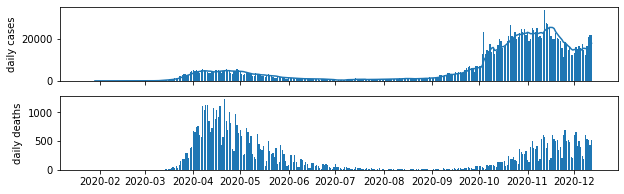

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 3))

ax1.plot(ans4['Date'], ans4['smooth_new_confirmed'])
ax1.bar(ans4['Date'], ans4['new_confirmed'])
ax1.set_ylabel('daily cases')

ax2.bar(ans4['Date'], ans4['new_deaths'])
ax2.set_ylabel('daily deaths')
plt.show()

### Question 6

In [44]:
provinces = covid[['Country/Region', 'Province/State']]
# provinces = provinces.drop_duplicates()
# provinces['provinces'] = provinces\
#     .groupby('Country/Region').transform(len)

provinces = provinces.drop_duplicates().dropna()

provinces['provinces'] = provinces\
    .groupby('Country/Region').transform(len)

provinces = provinces.drop_duplicates('Country/Region')\
    [provinces.provinces > 1]

provinces1 = covid[['Country/Region', 'Province/State']]

provinces1['metropole'] = provinces1.groupby('Country/Region')\
    .transform(lambda x: x.isnull().values.any().astype(int))

provinces1 = provinces1.drop_duplicates('Country/Region')

finalprov = provinces.merge(provinces1, on='Country/Region')

finalprov = finalprov.loc[:, ['Country/Region', 'metropole', 'provinces']]

ans6 = finalprov

ans6['Country/Region']

ans6

<ipython-input-44-e147197c0027>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  provinces = provinces.drop_duplicates('Country/Region')\
<ipython-input-44-e147197c0027>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provinces1['metropole'] = provinces1.groupby('Country/Region')\


,Country/Region,metropole,provinces
0,Australia,0,8
1,Canada,1,13
2,China,0,33
3,Denmark,1,2
4,France,1,10
5,Netherlands,1,4
6,United Kingdom,1,10


### Question 7

In [149]:
if os.path.exists('covid_countries_20201213.csv'):
    print('file already downloaded!')
else:
    !wget "https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/covid_countries_20201213.csv"
    
newcountries = pandas.read_csv('covid_countries_20201213.csv')

newcountries['Population'] = newcountries.groupby('Country_Region')\
    ['Population'].transform(max)

newcountries = newcountries[['Country_Region', 'Population', 'iso3']]

file already downloaded!


In [150]:
newdf = covid.copy()

addprovs = ['Australia', 'Canada', 'China']

newdf = newdf.loc[newdf['Country/Region'].isin(addprovs)]

newdf = newdf.dropna()

newdf[['Confirmed', 'Deaths', 'Population']] = \
    newdf.groupby(['Date', 'Country/Region'])\
    [['Confirmed', 'Deaths', 'Population']].transform(sum)

del newdf['Province/State']

newdf = newdf.drop_duplicates(['Date', 'Country/Region'])

addprovs = newdf

In [151]:
newdf = covid.copy()

keepnan = ['Denmark', 'France', 'Netherlands', 'United Kingdom']

newdf = newdf.loc[newdf['Country/Region'].isin(keepnan)]

newdf = newdf[newdf['Province/State'].isna()]

keepnan = newdf

newdf = covid.copy()

keep = ['Australia', 'Canada', 'China', 'Denmark', 
        'France', 'Netherlands', 'United Kingdom']

newdf = newdf.loc[~newdf['Country/Region'].isin(keep)]

covidc = pandas.concat([newdf, keepnan, addprovs])

del covidc['Province/State']

covidc['Date'] = pandas.to_datetime(covidc['Date'])

covidc = covidc.sort_values(['Country/Region', 'Date'])

newcountries = newcountries.drop_duplicates(['Country_Region'])

newcountries = newcountries.rename(columns=
                                   {'Country_Region': 
                                    'Country/Region'}) 

del covidc['Population']

del covidc['iso3']

covidc = covidc.merge(newcountries, on='Country/Region')

In [154]:
covidc = covidc.sort_values(['Country/Region', 'Date'])

covidc

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Population,iso3
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,38928341.0,AFG
1,Afghanistan,33.939110,67.709953,2020-01-23,0,0,0,38928341.0,AFG
2,Afghanistan,33.939110,67.709953,2020-01-24,0,0,0,38928341.0,AFG
3,Afghanistan,33.939110,67.709953,2020-01-25,0,0,0,38928341.0,AFG
4,Afghanistan,33.939110,67.709953,2020-01-26,0,0,0,38928341.0,AFG
...,...,...,...,...,...,...,...,...,...
62587,Zimbabwe,-19.015438,29.154857,2020-12-08,10912,303,9062,14862927.0,ZWE
62588,Zimbabwe,-19.015438,29.154857,2020-12-09,11007,304,9147,14862927.0,ZWE
62589,Zimbabwe,-19.015438,29.154857,2020-12-10,11081,305,9253,14862927.0,ZWE
62590,Zimbabwe,-19.015438,29.154857,2020-12-11,11162,306,9324,14862927.0,ZWE


## Part b

## Answer Submission

## Part a

### Initialize Autograder

In [156]:
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick2a')

Waiting for you to log in .. done.


### Question 1

In [158]:
num_rows = len(covid)
GRADER.submit_answer(GRADER.fetch_question('q1'), num_rows)

Correct!


True

### Question 2

In [159]:
GRADER.submit_answer(GRADER.fetch_question('q2'), ans2)

Correct!


True

### Question 3

In [160]:
GRADER.submit_answer(GRADER.fetch_question('q3'), 
                     ans3.reset_index(name='n'))

Correct!


True

### Question 4

In [161]:
q = GRADER.fetch_question('q4')
want = pandas.DataFrame(q.rows).assign(Date=lambda df: pandas.to_datetime(df.Date))
submit = ans4.merge(want)[q.want_cols].assign(Date=lambda df: df.Date.astype(str))
GRADER.submit_answer(q, submit)

Correct!


True

### Question 6

In [162]:
GRADER.submit_answer(GRADER.fetch_question('q6'), ans6)

Correct!


True

### Question 7

In [157]:
q = GRADER.fetch_question('q7')
want = pandas.DataFrame(q.rows).assign(Date=lambda df: pandas.to_datetime(df.Date))
submit = covidc.merge(want)[q.want_cols].assign(Date=lambda df: df.Date.astype(str))
GRADER.submit_answer(q, {'num_rows': len(covidc), 'details': submit})

Correct!


True

## Part b

### Initialise Autograder

In [ ]:
GRADER1b = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick2b')